# MNIST HAND-DIGITS REGCONITION

## Introduction & Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large and famous database of handwritten digits that is commonly used for training various image processing systems. Since MNIST is like the "Hello World" of machine learning with, I have tried out a few machine learning algorithms to enhanced my skills and get acquainted to the algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

This is my assignment for Developer Innovation Challenge of Facebook & Coder School VN

## Objective

I used 2 method to train this data: 
**Decision Tree & Random Forest
Neural Network**

Mainly used libraries: Sklearn, GridSearchCV to build model and train data.

For easy to understand how this data set was built, I get an example image, which contains number 7 from mist.
1. Resize it from 28x28 to 10X10 and make diagram. Each pixel in image contains value from 0 to 255. The greater the number, the whiter the color. That is the way how people encode the image. [Link](https://www.scan2cad.com/tips/bitmap-vs-vector/) for further information.
2. Because each observation should be one line in dataset so we reshape 2-D array to 1-D array. Using 1-D array as feature vector and label it. In our case, it's 7.
3. Do it again with the other images from mist. We will have a table with feature vector and label. Take a close look at first and third observation. The pattern of them are much similar than second observation. Base on this thing, we hope that can build a model that classify a number using feature vector.

Let's do it.

**Illustration Picture (copy from internet)**
![Imgur](https://i.imgur.com/wtFCKS3.jpg)

# READ DATASET

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Import dataset
data = pd.read_csv(r"C:\Users\Asus\Downloads\Dataset\CSML_W4\data\train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
# Let's take a look at first 5 rows
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# List all unique values are there in 'label', expect to see a list from 0 to 9
data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [5]:
# defines X and y for train_test_split 
# y is the column 'label' and X is rest (784 pixel columns)
list1=[]
for i in range(784):
    list1.append(str('pixel'+str(i)))
X=np.array(data[list1])
y=np.array([data['label']]).T

In [6]:
# Train test split
# Split X and y to X_train, y_train, X_test, y_test with 20% test size and random state 101
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

# VISUALIZE DATA

Label: [8]


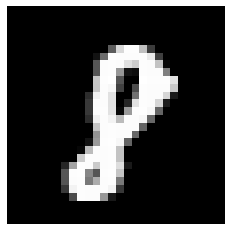

In [7]:
# Convertd some example of our data back to image
# Print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') to plot the image 28x28 in height and width.
# Before plotting, transformed the vector X_train[index] into 28x28 Matrix with the function reshape()
#Try the number with index is 36
index = 36
print("Label: " + str(y_train[index]))
plt.imshow(X_train[index].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()

# METHOD 1: DECISION TREE & RANDOM FOREST USING SKLEARN TOOL

## Train model

In [8]:
# Random Forest & Decision Tree
# Defined two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_predict=dtc.predict(X_test)

In [9]:
# Fit training data to Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as rc
rfc=rc()
rfc.fit(X_train,y_train)
y_predictrfc=rfc.predict(X_test)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


## Evaluate model

In [10]:
# Apply the models to testing set and take a look at accuracy score.
# Random Forest model:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictrfc)

0.9398809523809524

In [11]:
# Decision Tree model:
accuracy_score(y_test,y_predict)

0.8513095238095238

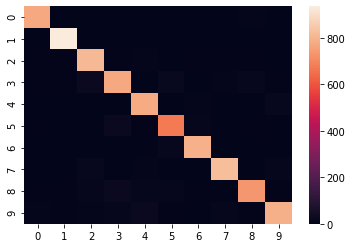

In [12]:
# Visualized the heatmap for confusion matrix of Random Forest model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predictrfc)
sns.heatmap(cm)

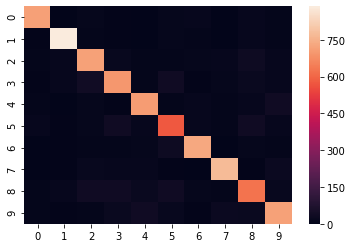

In [13]:
# Heatmap for confusion matrix of Decision Tree model as well:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm)


## Hyperparameter Tuning
[Further reading](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [14]:
# Base on the accuracy score I decided to take Random Forest as Classifier and improved it
# Defined an array of number called 'n'- the set of 'n_estimators' (number of "Tree") that was going apply to our Random Forest algorithms
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
result = []
# Using a for-loop which goes through n
# Inside the loop defined a new RandomForestClassifier model with appropriate 'n_estimators'
# Applied the model on X_test and calculate the accuracy score then save it into 'result'
for i in n:
    clf = RandomForestClassifier(i)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test,predictions))    

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

[0.8078571428571428, 0.9019047619047619, 0.9402380952380952, 0.9554761904761905, 0.9632142857142857, 0.9673809523809523, 0.9663095238095238, 0.9688095238095238]


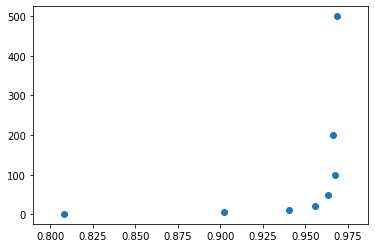

In [15]:
plt.scatter(result,n)
print(result)

## Save Model

In [16]:
# Using pickle to export the trained model
import pickle
import os

In [17]:
pickle.dump(rfc, open(os.path.join(r'C:\Users\Asus\Downloads\Dataset', 'HandDigitsPrediction.pkl'), 'wb'), protocol=4)

In [18]:
with open(r'C:\Users\Asus\Downloads\Dataset\HandDigitsPrediction.pkl', 'rb') as function:
 function=pickle.load(function)

## Speed up training process using GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
params_grid={
    'n_estimators':[1,5,10,20,50,100,200,500]
}

gridcv=GridSearchCV(RandomForestClassifier(),params_grid,n_jobs= 6)
gridcv.fit(X_train,y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [21]:
gridcv.best_score_

0.9616666666666667

In [22]:
#Create a dataframe using gridcv
pd.DataFrame(gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.804172,0.136739,0.123338,0.056002,1,{'n_estimators': 1},0.780684,0.762500,0.775029,0.772738,0.007599,8
1,4.903899,0.025892,0.119348,0.003291,5,{'n_estimators': 5},0.904758,0.892143,0.886755,0.894554,0.007544,7
2,4.036876,0.097264,0.192155,0.003291,10,{'n_estimators': 10},0.935999,0.928036,0.924265,0.929435,0.004891,6
3,7.394568,0.040367,0.236701,0.022878,20,{'n_estimators': 20},0.950549,0.943750,0.940252,0.944851,0.004275,5
4,15.673441,0.426452,0.527589,0.031790,50,{'n_estimators': 50},0.962064,0.955714,0.951237,0.956339,0.004442,4
5,30.340240,0.400269,0.906579,0.017333,100,{'n_estimators': 100},0.965009,0.958839,0.956060,0.959970,0.003740,3
6,64.361225,0.200251,1.626651,0.070372,200,{'n_estimators': 200},0.965277,0.961161,0.955970,0.960804,0.003808,2
7,115.367694,0.454314,3.265234,0.047712,500,{'n_estimators': 500},0.965813,0.960982,0.958203,0.961667,0.003144,1


# METHOD 2: Logistic Regression
Instead of building code lines with gradient descent algorithm (as I did with the Titanic Dataset), I will use Sklearn this time. But I also add the function which represented the Logistic Regression as a additional lines of code.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
### ADDITIONAL LINE
#sigmoid function:
def sigmoid(s):
    return 1/(1+np.exp(-s))

In [25]:
### ADDITIONAL LINE
#gradient descent:
def logistic_regression(x,y,w_init,eta,tol=1e-5,max_count=100000000000):
    m=x.shape[0]
    n=x.shape[1]
    w=[w_init]
    count=0
    check=20
    while count<max_count:
        mix=np.random.permutation(m)
        for i in mix:
            xi=x[i,:].reshape(n,1)
            yi=y[i]
            zi=sigmoid(np.dot(w[-1].T,xi))
            w_new=w[-1]+eta*(yi-zi)*xi
            count+=1
            #stop
            if count%check==0:
                if np.linalg.norm(w_new-w[-check])<tol:
                    return w[-1]
            w.append(w_new)
    return w[-1]

In [26]:
m=X_train.shape[0]
n=X_train.shape[1]
WW={}
for i in range(10):# for each of digits from 0 to 10, we train it seperately.One loop will represent for 1 digit training.
    list1=[]
    for k in range(y_train.shape[0]): #resize the train data into 1 and 0 (1 is positive when y is the number training, else if y not the number training, y=0)
        if y_train[k]==i:
            list1.append(1)
        else:
            list1.append(0)
    y1=np.array(list1)
    clf = LogisticRegression().fit(X_train, y1)
    y_predict=clf.predict_proba(X_train)
    WW[i]=y_predict

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.

In [27]:
list2=[]
for i in range(10):
    list2.append(WW[i].tolist())

In [34]:
#check the lens of train result
len(list2[1])

33600

In [35]:
list_new={}
for i in range(10):
    listt=[]
    for k in range(len(list2[i])):
        listt.append(list2[i][k][1])
        list_new[i]=listt

In [36]:
data_proba=pd.DataFrame(list_new)

In [37]:
data_proba.to_csv('data_proba.csv')

In [43]:
#plot 
data_proba.head(10)

,0,1,2,3,4,5,6,7,8,9
0,7.975045e-44,3.847470e-87,6.012537e-23,1.129601e-11,4.336411e-25,1.924193e-40,1.832616e-60,9.635738e-01,3.057692e-12,5.620166e-11
1,1.190756e-08,3.067718e-24,2.616751e-02,8.194145e-02,1.572645e-04,1.698436e-03,1.498423e-23,8.664674e-01,7.963643e-03,6.896132e-02
2,3.490513e-04,8.458936e-03,4.005551e-03,3.593487e-01,1.485200e-03,4.953043e-02,8.034572e-29,8.807708e-03,3.703759e-02,9.975709e-03
3,9.999103e-01,6.606115e-83,7.643282e-04,1.443970e-04,4.057213e-07,4.078687e-04,8.104660e-06,1.588764e-04,2.183415e-04,1.708118e-04
4,2.366401e-06,9.999779e-01,8.057694e-02,1.883796e-02,1.120224e-04,5.998305e-05,2.879090e-14,2.737263e-03,1.301027e-01,6.372595e-03
5,3.893065e-03,1.912588e-43,7.060639e-05,8.144045e-03,1.504738e-06,9.435324e-01,4.559206e-09,3.503884e-09,2.749533e-02,1.575646e-01
6,5.057199e-11,3.974918e-17,2.685620e-05,5.699865e-01,1.419288e-06,8.835505e-03,1.672772e-35,7.966016e-04,6.712216e-03,8.891904e-02
7,9.997552e-01,1.867777e-53,1.976484e-05,5.617452e-05,1.211852e-06,2.455819e-04,2.269798e-05,1.655246e-21,8.211308e-03,1.584365e-04
8,3.125977e-05,1.354190e-21,1.261640e-04,9.936329e-01,6.106287e-11,8.929819e-03,3.356834e-07,2.734506e-05,4.570474e-04,4.555001e-10
9,3.595372e-10,9.999847e-01,2.844329e-02,9.799486e-03,2.939586e-06,1.153297e-03,9.476692e-04,5.175800e-15,2.413872e-02,4.589744e-04


In [44]:
array_proba=np.array(data_proba)

In [45]:
y_upred=[]
for i in array_proba:
    count=-1
    for k in i:
        count+=1
        if max(i)==k:
            y_upred.append(count)

In [47]:
#check the accuracy
accuracy_score(y_train,y_upred)

0.9425

# Comments
Since Random Forest enable its user to upgrade the accuracy by using a "Forest of Decision Tree", its accuracy was much higher than the ordinary Decision Tree method (0.939 vs 0.851)

In the hyperparameter tunning, I tested a group of hyperparameters, which were represent number of "Tree" in a Random Forest. As you can see in the plotted map, we can see the more larger number the more accurate it was (but took more time to train). It seemed that 100 trees are enough to create an acceptable accuracy

The Logistic Regression trained and has acceptable accuracy. But it was time-consuming when I trained it, more than the 500-tree I used in Hyperparameter tunning